## Relaince- Data Analyst Test


#### Guided Steps

- Understanding the Problem Statement
- Data Checks to perform
- Data Cleaning
- Exploratory data analysis
- Data Pre-Processing


### 1) Problem statement
You are a Data Analyst working with the product team in charge of our Customer Care, among others the this team ensures that our self-service knowledge base is useful to our customers.

The knowledge base is a wiki site that contains articles around a broad set of topics, from general health to how to guides. Users navigate it using a search page which presents results ordered by an algorithm.

The Data Team uses Event logging (EL) to track a variety of performance and usage metrics to help on the decision making process.Specifically, the most used metrics are:

-A) clickthrough rate (CR) calculated as the proportion of search sessions where the user clicked on one of the results displayed.

-B) zero results rate (ZRR) calculated as the proportion of searches that yielded 0 results and other metrics outside the scope of this task. EL uses JavaScript to asynchronously send messages (events) to the servers when the user has performed specific actions. In this task, you will analyse a subset of our event logs.

The engineering team has been worked the site to improve the user experience, this change was tested in group B of the dataset below.

The Product Manager of the team comes to you on your weekly catch up and asks you too check whether the changes made have had a significant impact on user behaviour.



### 2) Data Collection
- Dataset Source - C:\Reliance_Health_Assessment\Reliance_Health\notebook\input_data\events_log_2.csv
- The data consists of 9 column and 400165 rows.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [20]:
events= pd.read_csv('events_log_2.csv') # read the data
# df['timestamp'] = df['timestamp'].astype(int)
# pd.DataFrame.to_csv(df,'events_log_.csv')
events.info() # check the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400165 entries, 0 to 400164
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uuid             400165 non-null  object 
 1   timestamp        400165 non-null  float64
 2   session_id       400165 non-null  object 
 3   group            400165 non-null  object 
 4   action           400165 non-null  object 
 5   checkin          223824 non-null  float64
 6   page_id          400165 non-null  object 
 7   n_results        136234 non-null  float64
 8   result_position  230482 non-null  float64
dtypes: float64(4), object(5)
memory usage: 27.5+ MB


In [21]:
events['timestamp'] = events['timestamp'].astype(int) #converting the timestamp to integers
events.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,-2147483648,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,-2147483648,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,-2147483648,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,-2147483648,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,-2147483648,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [22]:
pd.DataFrame.to_csv(events,'events_log_.csv')

In [31]:
event_df = pd.read_csv('events_log_.csv', parse_dates=['timestamp'], index_col='timestamp')
event_df.head()

,Unnamed: 0,uuid,session_id,group,action,checkin,page_id,n_results,result_position
timestamp,,,,,,,,,
-2147483648,0,00000736167c507e8ec225bd9e71f9e5,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
-2147483648,1,00000c69fe345268935463abbfa5d5b3,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
-2147483648,2,00003bfdab715ee59077a3670331b787,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
-2147483648,3,0000465cd7c35ad2bdeafec953e08c1a,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
-2147483648,4,000050cbb4ef5b42b16c4d2cf69e6358,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


## 1. What is the daily overall clickthrough rate? How does it vary between the groups?

In [32]:
group_daily_ctr = events.groupby(['timestamp', 'group']).apply(lambda x: (x['action'] == 'visitPage').sum() / (x['action'] == 'searchResultPage').sum())
group_daily_ctr 

timestamp    group
-2147483648  a        0.361356
             b        0.154873
dtype: float64

In [33]:
daily_ctr_a = 0.361356 # daily overall clickthrough rate for a
daily_ctr_b = 0.154873  # daily overall clickthrough rate for b

In [35]:
from scipy.stats import ttest_ind  # import ttest_ind for the statistical test

 ## What is the daily overall zero results rate? How does it vary between the groups? Is there a statistically significant difference?

In [37]:
zero_results_a=[]
zero_results_b=[]
for i, d in event_df.groupby([event_df.index,event_df.group]):
    if d['group'].iloc[0]=='a':
        zero_results_a.append(len(d['n_results'][d['n_results'] == 0]) / len(d['action'][d['action'] == 'searchResultPage']))
    else:
        zero_results_b.append(len(d['n_results'][d['n_results'] == 0]) / len(d['action'][d['action'] == 'searchResultPage']))

In [38]:
zero_results_b, zero_results_a

([0.1861786409525103], [0.1836056313548275])

In [39]:
zero_results_b = 0.1861786409525103
zero_results_a = 0.1836056313548275

## Is there a statistically significant difference?

In [40]:
# Perform the t-test
t_stat, p_value = ttest_ind(zero_results_a, zero_results_b)

# Output the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")


T-statistic: nan, P-value: nan
The difference between the groups is not statistically significant.


# Session Length
Let session length be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.

In [42]:
begin_first_action = event_df.sort_index().groupby(['session_id'], sort=True, as_index=False).nth(0).drop(['uuid','page_id','Unnamed: 0'],axis=1)
begin_first_action.head()

,session_id,group,action,checkin,n_results,result_position
timestamp,,,,,,
-2147483648,78245c2c3fba013a,b,searchResultPage,NaN,5.0,NaN
-2147483648,c559c3be98dca8a4,a,searchResultPage,NaN,10.0,NaN
-2147483648,760bf89817ce4b08,a,checkin,30.0,NaN,NaN
-2147483648,fb905603d31b2071,a,checkin,60.0,NaN,10.0
-2147483648,c2bf5e5172a892dc,a,checkin,30.0,NaN,NaN


In [43]:
begin_first_action['time'] = begin_first_action.index
begin_first_action.sort_values('session_id').head()

,session_id,group,action,checkin,n_results,result_position,time
timestamp,,,,,,,
-2147483648,0000cbcb67c19c45,b,searchResultPage,NaN,20.0,NaN,-2147483648
-2147483648,0001382e027b2ea4,b,checkin,240.0,NaN,1.0,-2147483648
-2147483648,0001e8bb90445cb2,b,checkin,300.0,NaN,1.0,-2147483648
-2147483648,000216cf18ae1ab1,a,searchResultPage,NaN,20.0,NaN,-2147483648
-2147483648,000527f711d50dfc,b,searchResultPage,NaN,1.0,NaN,-2147483648


In [44]:
last_action_end = event_df.sort_index().groupby(['session_id'], as_index=False, sort=True).nth(-1).drop(['page_id','uuid','Unnamed: 0'],axis=1)

In [45]:
last_action_end['time'] = last_action_end.index
last_action_end.sort_values('session_id').head()

,session_id,group,action,checkin,n_results,result_position,time
timestamp,,,,,,,
-2147483648,0000cbcb67c19c45,b,searchResultPage,NaN,20.0,NaN,-2147483648
-2147483648,0001382e027b2ea4,b,checkin,60.0,NaN,1.0,-2147483648
-2147483648,0001e8bb90445cb2,b,checkin,10.0,NaN,1.0,-2147483648
-2147483648,000216cf18ae1ab1,a,searchResultPage,NaN,20.0,NaN,-2147483648
-2147483648,000527f711d50dfc,b,searchResultPage,NaN,1.0,NaN,-2147483648


In [47]:
session_strt_end = pd.merge(begin_first_action, last_action_end, on = ['session_id','group'], suffixes=('_first_action','_last_action'))
session_strt_end.head()

,session_id,group,action_first_action,checkin_first_action,n_results_first_action,result_position_first_action,time_first_action,action_last_action,checkin_last_action,n_results_last_action,result_position_last_action,time_last_action
0,78245c2c3fba013a,b,searchResultPage,NaN,5.0,NaN,-2147483648,visitPage,NaN,NaN,3.0,-2147483648
1,c559c3be98dca8a4,a,searchResultPage,NaN,10.0,NaN,-2147483648,searchResultPage,NaN,20.0,NaN,-2147483648
2,760bf89817ce4b08,a,checkin,30.0,NaN,NaN,-2147483648,checkin,120.0,NaN,1.0,-2147483648
3,fb905603d31b2071,a,checkin,60.0,NaN,10.0,-2147483648,visitPage,NaN,NaN,10.0,-2147483648
4,c2bf5e5172a892dc,a,checkin,30.0,NaN,NaN,-2147483648,visitPage,NaN,NaN,NaN,-2147483648


In [48]:
session_strt_end['session_length'] = session_strt_end['time_last_action'] - session_strt_end['time_first_action']

In [50]:
session_strt_end.head()

,session_id,group,action_first_action,checkin_first_action,n_results_first_action,result_position_first_action,time_first_action,action_last_action,checkin_last_action,n_results_last_action,result_position_last_action,time_last_action,session_length
0,78245c2c3fba013a,b,searchResultPage,NaN,5.0,NaN,-2147483648,visitPage,NaN,NaN,3.0,-2147483648,0
1,c559c3be98dca8a4,a,searchResultPage,NaN,10.0,NaN,-2147483648,searchResultPage,NaN,20.0,NaN,-2147483648,0
2,760bf89817ce4b08,a,checkin,30.0,NaN,NaN,-2147483648,checkin,120.0,NaN,1.0,-2147483648,0
3,fb905603d31b2071,a,checkin,60.0,NaN,10.0,-2147483648,visitPage,NaN,NaN,10.0,-2147483648,0
4,c2bf5e5172a892dc,a,checkin,30.0,NaN,NaN,-2147483648,visitPage,NaN,NaN,NaN,-2147483648,0


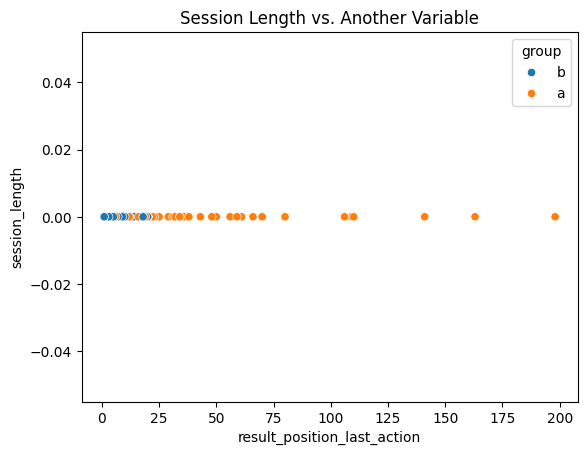

In [52]:
# import matplotlib.pyplot as plt

# Visualization
sns.scatterplot(data=session_strt_end, x='result_position_last_action', y='session_length', hue='group')
plt.title('Session Length vs. Another Variable')
plt.show()

In [ ]:
fig = plt.figure(figsize = [13,6])

bins = np.linspace(0, 800, 100)

plt.subplot(1,2,1)
session_strt_end['session_length'].hist(color='k', alpha=0.5, bins=bins)
plt.xlabel('session length [s]', size=13)
plt.title('Overall distribution of session length', size=15)

plt.subplot(1,2,1)
plt.scatter(session_strt_end['checkin_last_action'], session_strt_end['session_length']);
plt.title('Overall distribution of session length', size=15)
plt.xlim([0, 500])
plt.ylim([0, 85000])

plt.xlabel('Lenght of the last action in the session [s]', size=13)
plt.ylabel('Total session length', size=13)

plt.tight_layout()
plt.show()

: 

In [ ]:
fig = plt.figure(figsize = [13,6])

bins = np.linspace(0, 800, 100)

plt.subplot(1,2,1)
session_strt_end['session_length'].hist(color='k', alpha=0.5, bins=bins)
plt.xlabel('session length [s]', size=13)
plt.title('Overall distribution of session length', size=15)

plt.subplot(1,2,1)
plt.scatter(session_strt_end['checkin_last_action'], session_strt_end['session_length']);
plt.title('Overall distribution of session length', size=15)
plt.xlim([0, 500])
plt.ylim([0, 85000])

plt.xlabel('Lenght of the last action in the session [s]', size=13)
plt.ylabel('Total session length', size=13)

plt.tight_layout()
plt.show()

: 

: 

In [ ]:
# # Perform t-test between groups
# group_a_zrr = df[df['group'] == 'a']
# # group_b_zrr = df[df['group'] == 'b']

# # t_stat, p_value = ttest_ind(group_a_zrr, group_b_zrr)
# # print(f"T-statistic: {t_stat}, P-value: {p_value}")

: 

In [ ]:
# zero_results_sessions = len(df[df['n_results'] == 0])/len(df[df['n_results'] == 'searchResultPage'])
# # .groupby(['timestamp', 'group'])['session_id'].nunique().reset_index(name='zero_results_sessions')



: 

In [ ]:
# Example data: Zero results rates for group A and group B
# zero_results_a = [0.1, 0.15, 0.12, 0.09, 0.11]
# zero_results_b = [0.2, 0.18, 0.21, 0.19, 0.17]

: 

In [ ]:
# zero_results_a = events.groupby(['timestamp', 'group']).apply(lambda x: len((x['n_results'] == 0))/ len((x['n_results'] == 'searchResultPage')))


: 

In [ ]:
zero_results_b, zero_results_a

: 

In [ ]:
zero_results_a

: 

In [ ]:
fig = plt.figure(figsize = [13,6])

plt.subplot(1,3,1)
df['n_results'].hist(color='k', alpha=0.5, bins=500)
plt.xlim([-5, 30])
plt.title('Overall distribution of no of results', size=15)

plt.subplot(1,3,2)
index = np.arange(8)
bar_width = 0.35

rects1 = plt.bar(index, zero_results_a, bar_width,
                 alpha=0.5,
                 color='b',
                 label='A')

rects2 = plt.bar(index + bar_width, zero_results_b, bar_width,
                 alpha=0.5,
                 color='r',
                 label='B')

plt.ylim([0, 0.25])
plt.title('Daily zero results rate', size=15)

plt.xlabel('Day', size=13)
plt.ylabel('Zero results rate', size=13)

plt.xticks(index + bar_width / 2, ('1', '2', '3', '4', '5','6','7','8'))
plt.legend()

ax = plt.subplot(1,3,3)

index = np.arange(2)

mean1 = sum(zero_results_a)/len(zero_results_a)
mean2 = sum(zero_results_b)/len(zero_results_b)
means = [mean1, mean2]

zero_error_a = stats.sem(zero_results_a, axis=0)
zero_error_b = stats.sem(zero_results_b, axis=0)
zero_error = [zero_error_a,zero_error_b]

rects = ax.bar(range(len(means)), means, bar_width, color='k', 
               alpha=0.5, 
               yerr=zero_error, 
               error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))

plt.ylim([0, 0.20])
plt.xlim([-0.25, 1.5])

plt.title('Overall daily zero results rate: mean', size=15)

plt.xlabel('Group', size=13)
plt.ylabel('Zero results rate', size=13)

plt.xticks(index + bar_width / 2, ('A', 'B'), size=13)

plt.tight_layout()
plt.show()


: 

In [ ]:
mean_CRT = sum(clickthroughrate)/len(clickthroughrate)
mean_CRT_A = sum(clickthroughratea)/len(clickthroughratea)
mean_CRT_B = sum(clickthroughrateb)/len(clickthroughrateb)

: 

In [ ]:
mean_CRT,mean_CRT_A, mean_CRT_B 

: 

: 

: 